In this code example, we use audio .wav datasets to extract short-term and mid-term audio features. Here we have used the pyAudioAnalysis library to extract the features and plot it.

refr :https://dolby.io/blog/creating-audio-features-with-pyaudio-analysis/
https://github.com/tyiannak/pyAudioAnalysis/wiki/4.-Classification-and-Regression,



In [2]:
from google.colab import drive
import sys
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/mental-health-codes"
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/mental-health-codes/pyAudioAnalysis')
#import utilities as ut

%reload_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/mental-health-codes


In [3]:
!git clone https://github.com/tyiannak/pyAudioAnalysis.git


fatal: destination path 'pyAudioAnalysis' already exists and is not an empty directory.


In [6]:
!pip3 install -r ./pyAudioAnalysis/requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 19.3 MB/s eta 0:00:00


In [7]:
!pip3 install -e pyAudioAnalysis/.

Obtaining file:///content/drive/My%20Drive/Colab%20Notebooks/mental-health-codes/pyAudioAnalysis
  Preparing metadata (setup.py) ... done
  Running setup.py develop for pyAudioAnalysis


Here we perform short-term feature extraction, **Short-term feature extraction:** this is implemented in function feature_extraction() of the ShortTermFeatures.py file. It splits the input signal into short-term widnows (frames) and computes a number of features for each frame. This process leads to a sequence of short-term feature vectors for the whole signal.


The total number of short-term features implemented in pyAudioAnalysis is 34. In addition, the delta features are optionally computed (they are by default enabled, but can be disabled by setting the deltas argument in feature_extraction() to false). So, the total number of short-term features, including the deltas is 64.

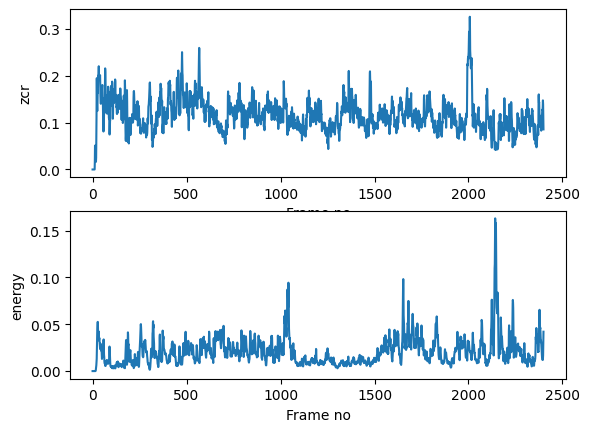

In [9]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
[Fs, x] = audioBasicIO.read_audio_file("test.wav")
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0])
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [14]:
print(f_names)

['zcr_mean', 'energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean', 'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_1_mean', 'chroma_2_mean', 'chroma_3_mean', 'chroma_4_mean', 'chroma_5_mean', 'chroma_6_mean', 'chroma_7_mean', 'chroma_8_mean', 'chroma_9_mean', 'chroma_10_mean', 'chroma_11_mean', 'chroma_12_mean', 'chroma_std_mean', 'delta zcr_mean', 'delta energy_mean', 'delta energy_entropy_mean', 'delta spectral_centroid_mean', 'delta spectral_spread_mean', 'delta spectral_entropy_mean', 'delta spectral_flux_mean', 'delta spectral_rolloff_mean', 'delta mfcc_1_mean', 'delta mfcc_2_mean', 'delta mfcc_3_mean', 'delta mfcc_4_mean', 'delta mfcc_5_mean', 'delta mfcc_6_mean', 'delta mfcc_7_mean', 'delta mfcc_8_mean', 'delta mfcc_9_

**Mid-term feature extraction:** In many cases, the signal is represented by statistics on the extracted short-term feature sequences described above. Towards this end, function mid_feature_extraction() from the MidTermFeatures.py file extracts a number of statistcs (e.g. mean and standard deviation) over each short-term feature sequence.

In [15]:
from pyAudioAnalysis import MidTermFeatures
[Fs, x] = audioBasicIO.read_audio_file("test.wav")
F, s_names, f_names = MidTermFeatures.mid_feature_extraction(x, Fs, 1.0*Fs, 1.0*Fs, 0.050*Fs, 0.050*Fs)

In [16]:
print(f_names)

['zcr_mean', 'energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean', 'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_1_mean', 'chroma_2_mean', 'chroma_3_mean', 'chroma_4_mean', 'chroma_5_mean', 'chroma_6_mean', 'chroma_7_mean', 'chroma_8_mean', 'chroma_9_mean', 'chroma_10_mean', 'chroma_11_mean', 'chroma_12_mean', 'chroma_std_mean', 'delta zcr_mean', 'delta energy_mean', 'delta energy_entropy_mean', 'delta spectral_centroid_mean', 'delta spectral_spread_mean', 'delta spectral_entropy_mean', 'delta spectral_flux_mean', 'delta spectral_rolloff_mean', 'delta mfcc_1_mean', 'delta mfcc_2_mean', 'delta mfcc_3_mean', 'delta mfcc_4_mean', 'delta mfcc_5_mean', 'delta mfcc_6_mean', 'delta mfcc_7_mean', 'delta mfcc_8_mean', 'delta mfcc_9_

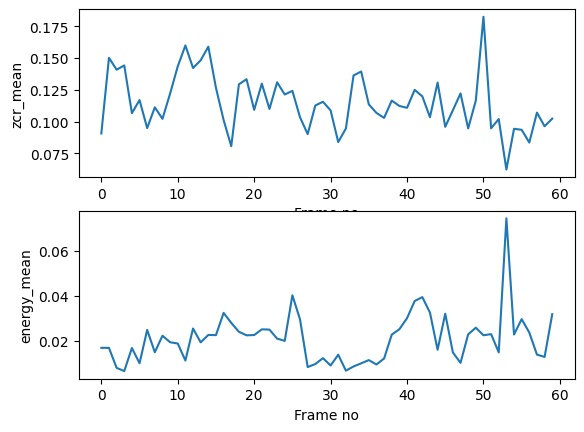

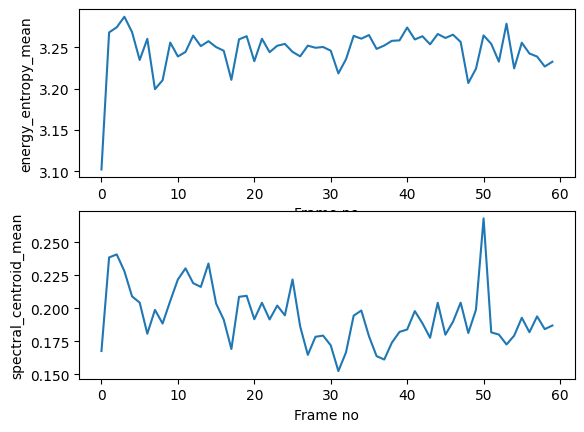

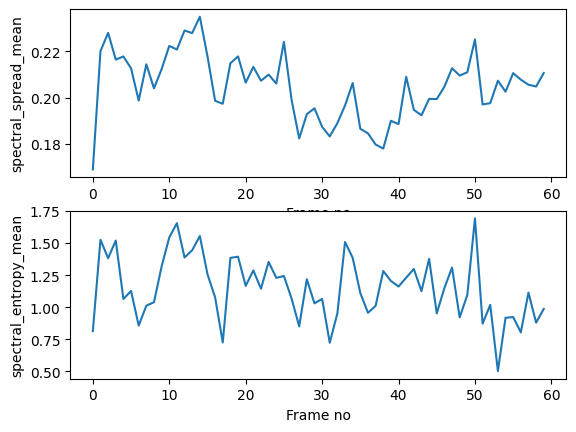

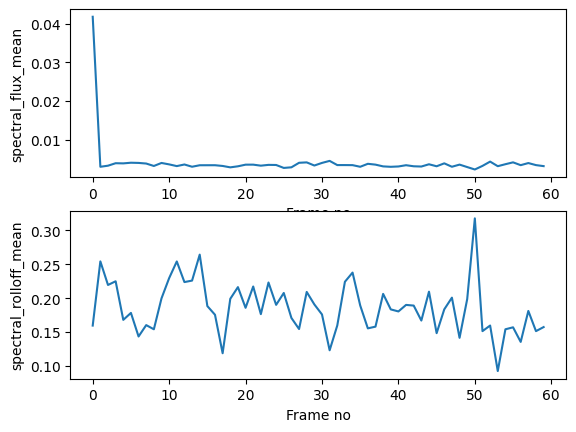

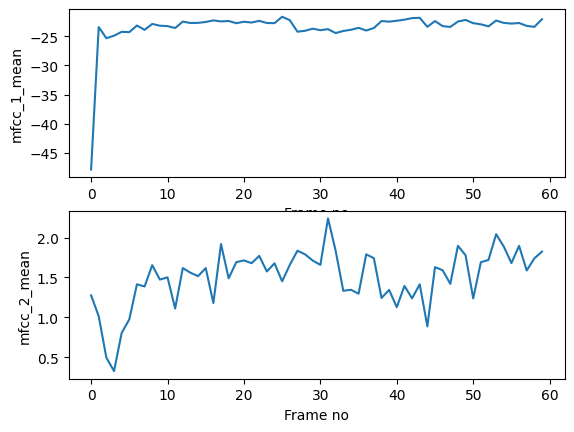

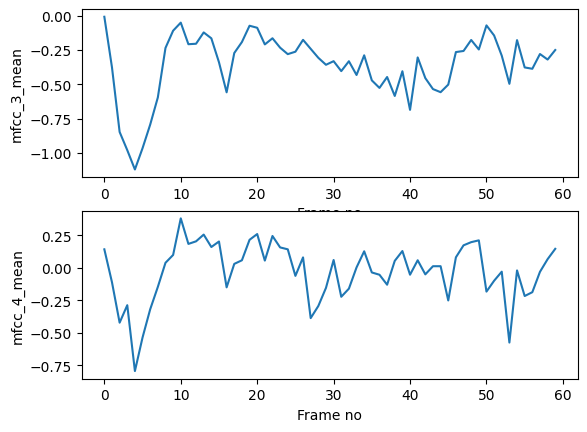

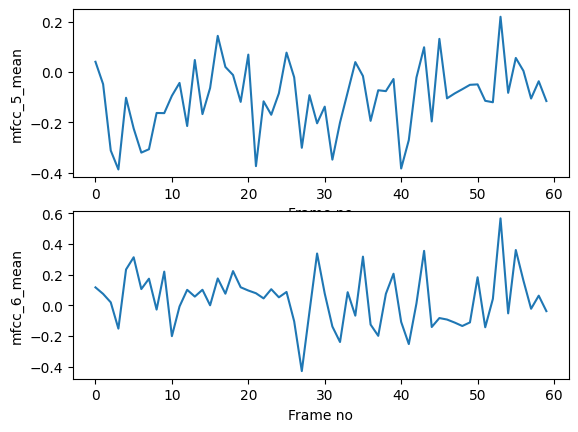

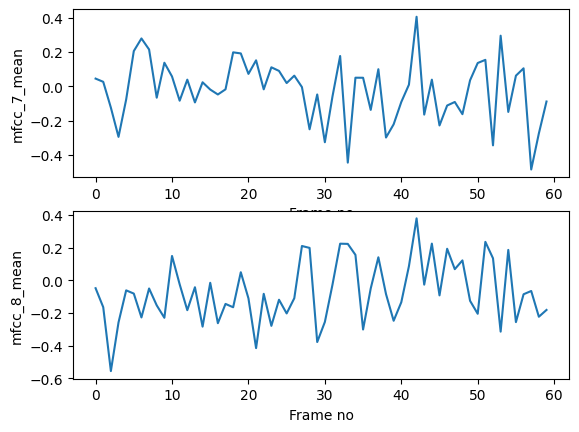

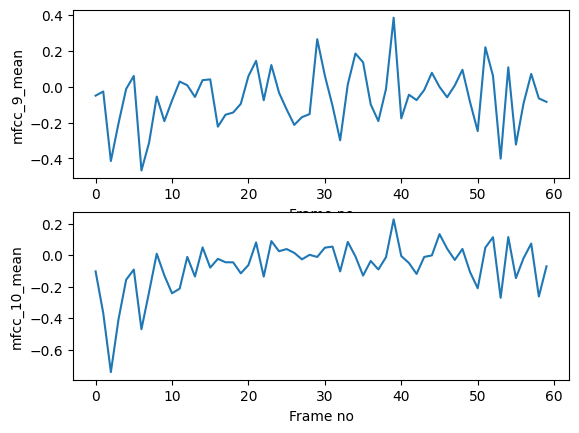

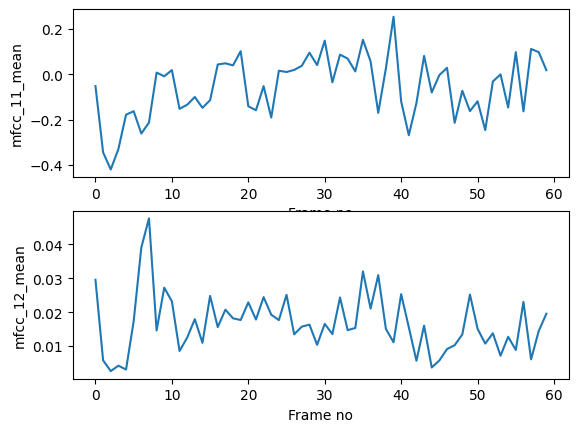

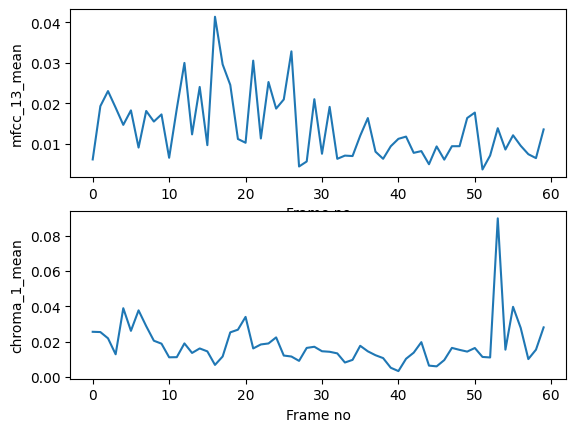

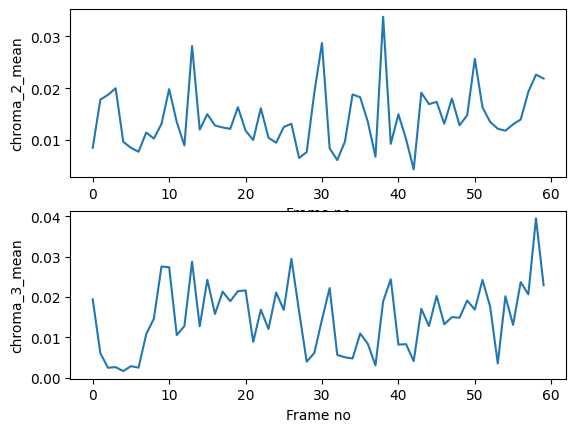

In [17]:
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0])
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()


plt.subplot(2,1,1); plt.plot(F[2,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[2])
plt.subplot(2,1,2); plt.plot(F[3,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[3]); plt.show()


plt.subplot(2,1,1); plt.plot(F[4,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[4])
plt.subplot(2,1,2); plt.plot(F[5,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[5]); plt.show()


plt.subplot(2,1,1); plt.plot(F[6,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[6])
plt.subplot(2,1,2); plt.plot(F[7,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[7]); plt.show()


plt.subplot(2,1,1); plt.plot(F[8,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[8])
plt.subplot(2,1,2); plt.plot(F[9,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[9]); plt.show()


plt.subplot(2,1,1); plt.plot(F[10,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[10])
plt.subplot(2,1,2); plt.plot(F[11,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[11]); plt.show()


plt.subplot(2,1,1); plt.plot(F[14,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[12])
plt.subplot(2,1,2); plt.plot(F[15,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[13]); plt.show()


plt.subplot(2,1,1); plt.plot(F[16,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[14])
plt.subplot(2,1,2); plt.plot(F[17,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[15]); plt.show()

plt.subplot(2,1,1); plt.plot(F[18,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[16])
plt.subplot(2,1,2); plt.plot(F[19,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[17]); plt.show()

plt.subplot(2,1,1); plt.plot(F[20,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[18])
plt.subplot(2,1,2); plt.plot(F[21,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[19]); plt.show()


plt.subplot(2,1,1); plt.plot(F[22,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[20])
plt.subplot(2,1,2); plt.plot(F[23,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[21]); plt.show()


plt.subplot(2,1,1); plt.plot(F[24,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[22])
plt.subplot(2,1,2); plt.plot(F[25,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[23]); plt.show()

In [18]:
%matplotlib notebook


In [19]:
!python3 pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py fileChromagram -i pyAudioAnalysis/pyAudioAnalysis/data/doremi.wav


Figure(640x480)


In [20]:
%%python3 pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py fileChromagram -i test.wav


Figure(640x480)


In [21]:
!python3 pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py beatExtraction -i pyAudioAnalysis/pyAudioAnalysis/data/beat/small.wav --plot


Figure(640x480)
Figure(640x480)
Beat: 120 bpm 
Ratio: 0.53 


**Short-term features** are features calculated on a user defined “frame”. The signal is split into these frames where the package then computes a number of features for each frame, outputting a feature vector for the whole signal.
Mid-term features are features calculated on short-term feature sequences and includes common statistics such as mean and standard deviation for each short-term sequence.
Altogether the feature extraction creates 34 features for each frame that fits within the provided audio signal. For example with we have one minute of audio and set a frame length of 0.025 seconds our resulting matrix will be 34 by 2400 rows. These features include a variety of signal processing nomenclature and are briefly described in the table provided by the PyAudio Analysis wiki below:

# Feature Name	Description

**Zero-Crossing Rate**	The rate of sign changes of the signal during the duration of a particular frame.

**Energy**	The sum of squares of the signal values, normalized by the respective frame length.

**Entropy of Energy**	The entropy of sub-frames normalized energies. It can be interpreted as a measure of abrupt changes.

**Spectral Centroid**	The center of gravity of the spectrum.

**Spectral Spread	**The second central moment of the spectrum.

**Spectral Entropy**	The entropy of the normalized spectral energies for a set of sub-frames.

**Spectral Flux**	The squared difference between the normalized magnitudes of the spectra of the two successive frames.

**Spectral Rolloff**	The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.

**MFCCs (9-21)**	Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

**Chroma Vector (22-33)**	A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).

**Chroma Deviation**	The standard deviation of the 12 chroma coefficients.
Table outlining features and descriptions.

**These features can be generated for a series of audio samples through the command line. In this case, we have four parameters to specify with relation to feature creation, the mid-term window size (mw), the mid-term step size (ms), the short-term window size (sw), and the short-term step size (ss).**

In [22]:
!python3 pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py featureExtractionDir -i pyAudioAnalysis/pyAudioAnalysis/data/ -mw 1.0 -ms 1.0 -sw 0.050 -ss 0.050

Short-term np file: pyAudioAnalysis/pyAudioAnalysis/data/3WORDS.wav_st.npy saved
Short-term CSV file: pyAudioAnalysis/pyAudioAnalysis/data/3WORDS.wav_st.csv saved
Mid-term np file: pyAudioAnalysis/pyAudioAnalysis/data/3WORDS.wav_mt.npy saved
Mid-term CSV file: pyAudioAnalysis/pyAudioAnalysis/data/3WORDS.wav_mt.csv saved
Short-term np file: pyAudioAnalysis/pyAudioAnalysis/data/count.wav_st.npy saved
Short-term CSV file: pyAudioAnalysis/pyAudioAnalysis/data/count.wav_st.csv saved
Mid-term np file: pyAudioAnalysis/pyAudioAnalysis/data/count.wav_mt.npy saved
Mid-term CSV file: pyAudioAnalysis/pyAudioAnalysis/data/count.wav_mt.csv saved
/content/drive/My Drive/Colab Notebooks/mental-health-codes/pyAudioAnalysis/pyAudioAnalysis/../pyAudioAnalysis/audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io
Short-term np file: pyAudioAnalysis/pyAudioAnalysis/data/count2.wav_st.npy saved
Short-term CSV file

## **Regression** can be rather important in audio analysis, e.g. in the context of speech emotion recognition, where the emotional state is not a discrete class but a real-valued measurement (e.g. arousal or valence). audioTrainTest.py also provides regression-related functionalities.


Train Regression Models for Audio Segments
Similarly to **extract_features_and_train**(), function **feature_extraction_train_regression**() reads the contents (i.e. the WAV files) of a given folder along with the respective real values and it returns a regression model.


The function used to train one or more regression models is **feature_extraction_train_regression**(). It calls functions **multiple_directory_feature_extraction**() to extract the audio features and then repetivelly calls **evaluate_regression**() to extract one optimized regression model for each learned parameter. The following example trains two regression models (valence and arousal) related to the speech emotion recognition task (as explained above each variable corresponds to a CSV-groundtruth file that needs to be available in the data folder).

In [23]:
from pyAudioAnalysis import audioTrainTest as aT
aT.feature_extraction_train_regression("pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/", 1, 1, aT.shortTermWindow, aT.shortTermStep, "svm", "pyAudioAnalysis/pyAudioAnalysis/data/svmSpeechEmotion", False)

Analyzing file 1 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/00.wav
Analyzing file 2 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/01.wav
Analyzing file 3 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/02.wav
Analyzing file 4 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/03.wav
Analyzing file 5 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/04.wav
Analyzing file 6 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/05.wav
Analyzing file 7 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/06.wav
Analyzing file 8 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/07.wav
Analyzing file 9 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/08.wav
Analyzing file 10 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/09.wav
Analyzing file 11 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/10.wav
Analyzing file 12 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/11.wav
Analyzing fil

([0.07817638947127215, 0.2622074208577956],
 [0.3520797400226758, 0.3767215422902494],
 [0.01, 10.0])

The result of the above code is two regression models (4 files in total if we consider the normalization files that store the MEAN and STANDARD DEVIATION arrays).
We can also perform the same using command-line use as:


In [26]:
!python3 pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py trainRegression -i pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/ --method svm -o pyAudioAnalysis/pyAudioAnalysis/data/svmSpeechEmotion


Analyzing file 1 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/00.wav
Analyzing file 2 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/01.wav
Analyzing file 3 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/02.wav
Analyzing file 4 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/03.wav
Analyzing file 5 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/04.wav
Analyzing file 6 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/05.wav
Analyzing file 7 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/06.wav
Analyzing file 8 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/07.wav
Analyzing file 9 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/08.wav
Analyzing file 10 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/09.wav
Analyzing file 11 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/10.wav
Analyzing file 12 of 47: pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/11.wav
Analyzing fil

In [38]:
!python3 pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py regressionFile -i pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/anger01.wav --model svm --regression pyAudioAnalysis/pyAudioAnalysis/data/svmSpeechEmotion


arousal	0.700
valence	-0.350


In [40]:
!python3 pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py regressionFile -i pyAudioAnalysis/pyAudioAnalysis/data/speechEmotion/38.wav --model svm --regression pyAudioAnalysis/pyAudioAnalysis/data/svmSpeechEmotion


arousal	0.012
valence	0.229
